In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from utilities import wav2data
from Spectrogram import spectrogram
from ripser import Rips
from sklearn import datasets

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
%matplotlib notebook

In [5]:
from soundsig.sound import BioSound 
from AttractorReconstructUtilities import TimeSeries3D,TimeDelayReconstruct, TimeSeries2Ani 
from persim import PersImage

In [6]:
# Go to the folder that has the h5 files corresponding to the BioSound objects.
h5dir = '/Users/Alicia/Desktop/BioSoundTutorial/BirdCalls/h5files300_3000'
os.chdir(h5dir)

In [ ]:
#!python /Users/Alicia/AnacondaProjects/LoadFilterCalls.py

In [7]:
vocSelData = []
segmentLength = 400
dimension = 20
tau = 4
for fname in os.listdir('.'):
    if fname.endswith('.h5'):
        # Allocate object and read data
        myBioSound = BioSound()
        myBioSound.readh5(fname)
        # These are our two identifier - the emitter (bird) and the call type
        Bird = np.array2string(myBioSound.emitter)[2:-1]
        callType = np.array2string(myBioSound.type)[2:-1]
        sound = myBioSound.sound
        midSeg = sound[int((len(sound)/2))-int(segmentLength/2):int((len(sound)/2))+int(segmentLength/2)]
        timeDelayedSeg = TimeDelayReconstruct(midSeg, Dimension=dimension, TimeDelayIndex=tau)
        pca = PCA(n_components=3)
        timeDelayedSeg = pca.fit_transform(timeDelayedSeg)
        vocSelData.append({"Bird": Bird, "calltype": callType, "sound": sound, "midSeg": midSeg, "timeDelayedSeg":timeDelayedSeg}) 

In [8]:
birdNames = []
for voc in vocSelData:
    if voc['Bird'] not in birdNames:
        birdNames.append(voc['Bird'])    

In [10]:
allTimeDelayedSeg=[]
labels=[]
ilabel=0
for name in birdNames:
    for voc in vocSelData: 
        if name in voc['Bird']:
            print(voc['Bird'])
            allTimeDelayedSeg.append(voc['timeDelayedSeg'])
            labels.append(ilabel)
    ilabel+=1   
labels=np.array(labels)

WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
WhiRas44dd
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelGre5275
YelOra2575
YelOra2575
YelOra2575
YelOra2575
YelOra2575
YelOra2575
YelOra2575
YelOra2575
YelOra2575
YelOra2575
YelOra2575
YelOra2575
YelOra2575
YelOra2575
YelOra2575
YelOra2575
YelOra2575
YelOra2575
YelOra2575
YelOra2575
WhiLbl0010
WhiLbl0010
WhiLbl0010
WhiLbl0010
WhiLbl0010
WhiLbl0010
WhiLbl0010
WhiLbl0010
WhiLbl0010
WhiLbl0010
WhiLbl0010
WhiLbl0010
WhiLbl0010
WhiLbl0010
WhiLbl0010
WhiLbl0010
WhiLbl0010
WhiLbl0010
WhiLbl0010
WhiLbl0010
WhiLbl0010

In [11]:
rips = Rips(maxdim=1, coeff=2)
diagrams = [rips.fit_transform(data) for data in allTimeDelayedSeg]
diagrams_h1 = [rips.fit_transform(data)[1] for data in allTimeDelayedSeg]
diagrams_h0 = [rips.fit_transform(data)[0] for data in allTimeDelayedSeg]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


<IPython.core.display.Javascript object>


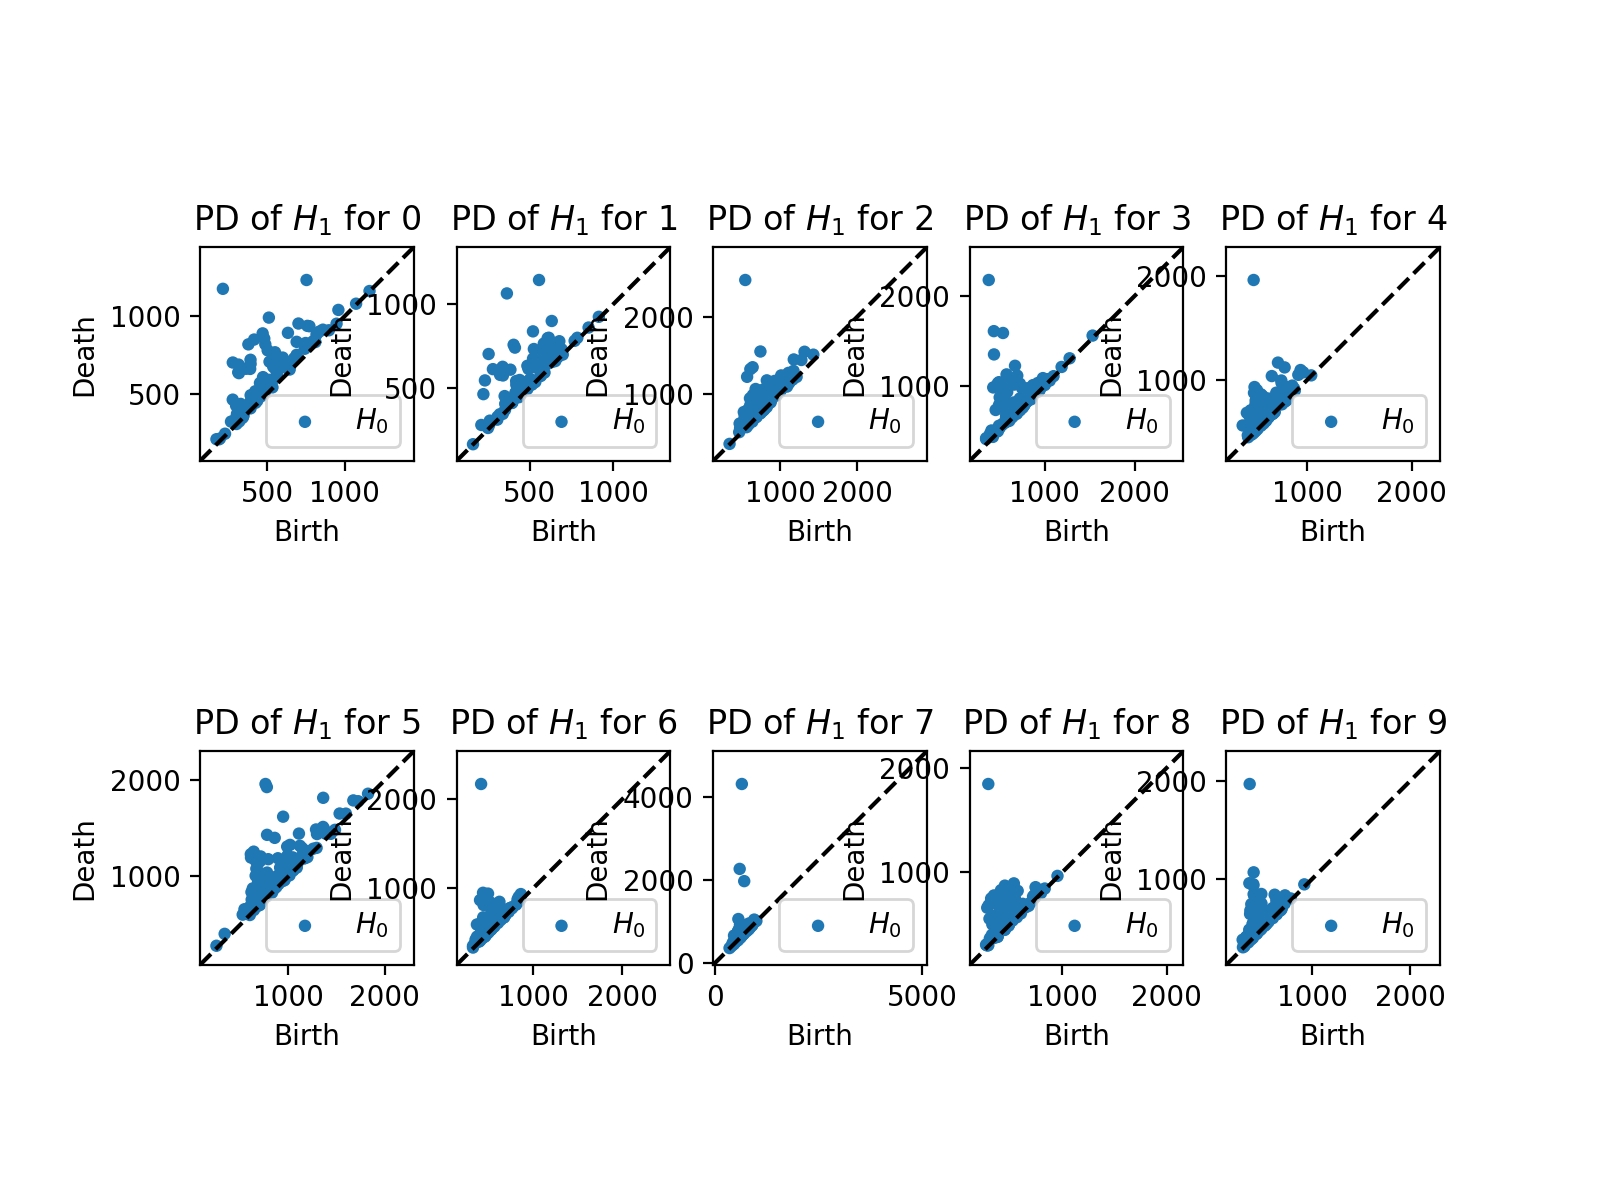

In [12]:
plt.figure(figsize=(8,6))
indices = np.concatenate((np.where(labels==0)[0], np.where(labels==3)[0]))
for i in range(10):
    plt.subplot(2,5,i+1)
    rips.plot(diagrams_h1[indices[i]], show=False)
    plt.title("PD of $H_1$ for %d" %i)
plt.show()

In [13]:
pim = PersImage(pixels=[25,25], spread=1)
imgs = pim.transform(diagrams_h1)
#imgs0 = pim.transform(diagrams_h0)

PersImage(pixels=[25, 25], spread=1, specs=None, kernel_type="gaussian", weighting_type="linear")


In [14]:
imgs_array = np.array([img.flatten() for img in imgs])

<IPython.core.display.Javascript object>


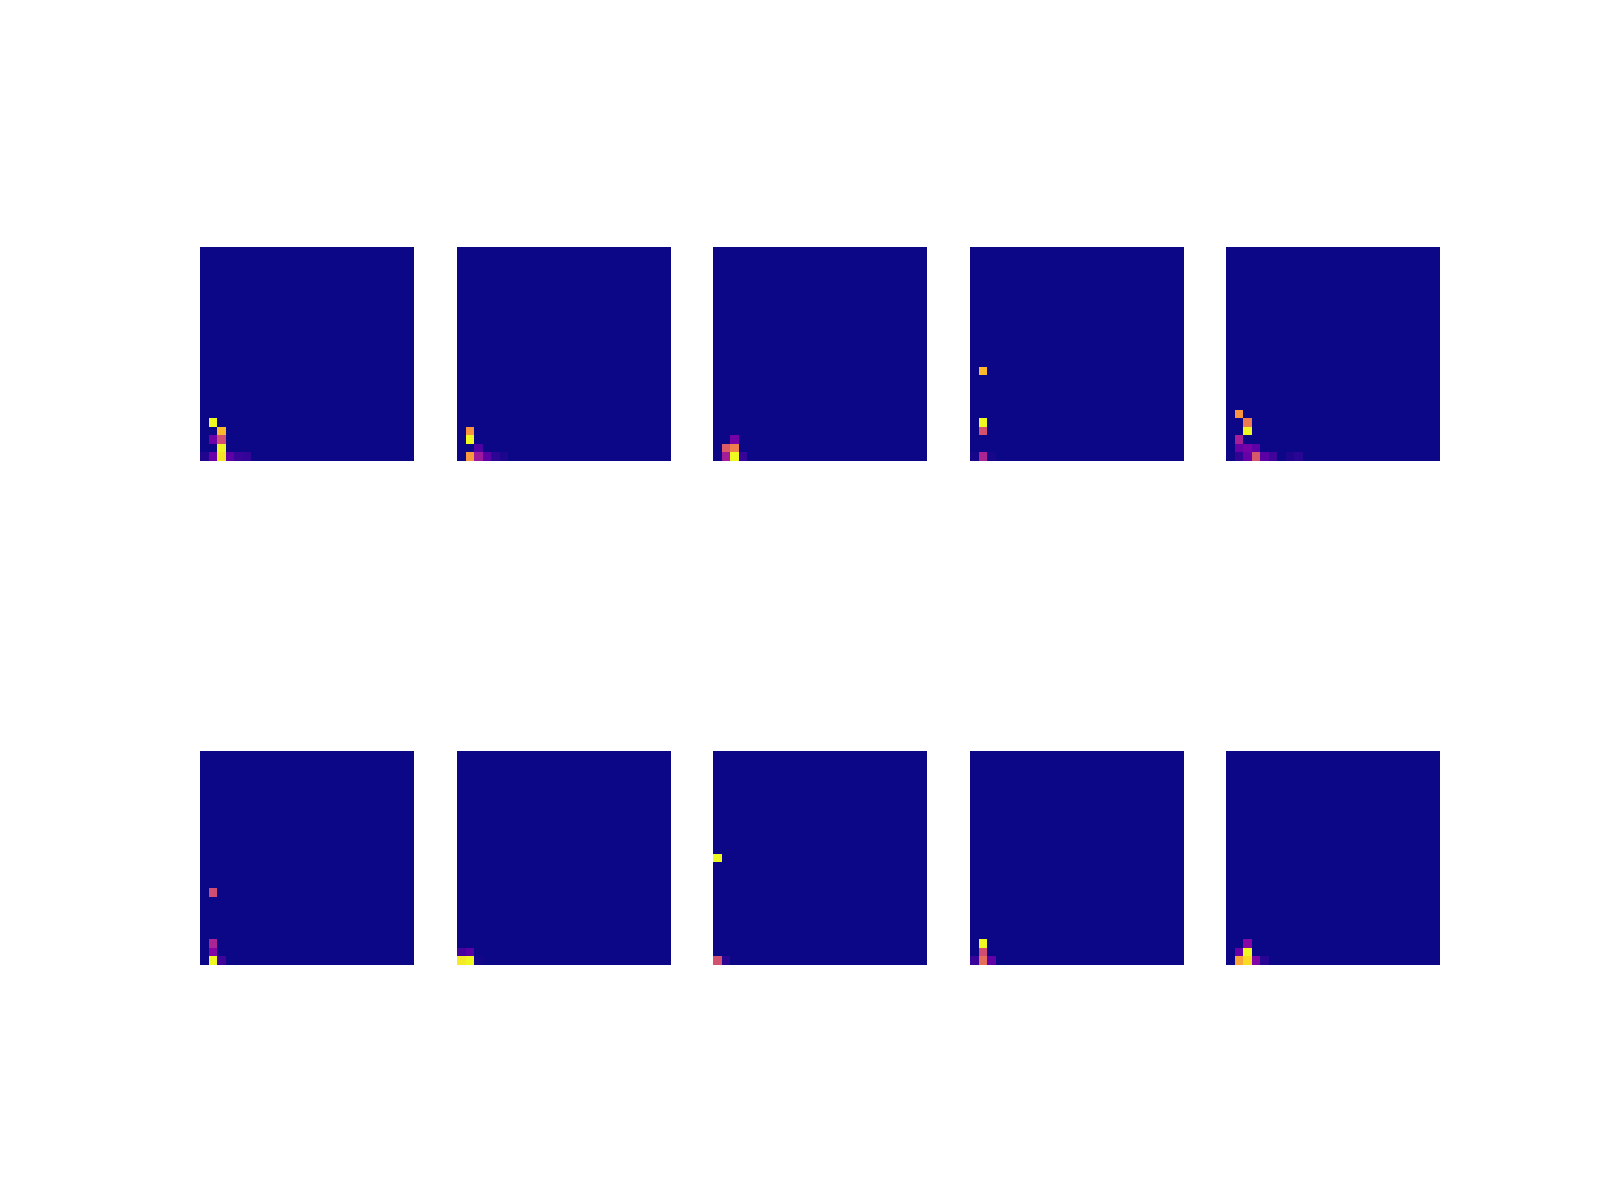

In [20]:
plt.figure(figsize=(8,6))
indices = np.concatenate((np.where(labels==1)[0], np.where(labels==2)[0]))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    pim.show(imgs[-indices[i]], ax)
plt.show()

In [153]:
indices = np.concatenate((np.where(labels==2)[0], np.where(labels==0)[0]))
X_train, X_test, y_train, y_test = train_test_split(imgs_array[:], labels[:], test_size=0.1, random_state=51)

In [154]:
lr = LogisticRegression(multi_class='ovr',solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
lr.score(X_test, y_test)

0.5

In [22]:
y = labels
X = imgs_array

In [23]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import StratifiedKFold
from scipy.stats import binom

<IPython.core.display.Javascript object>


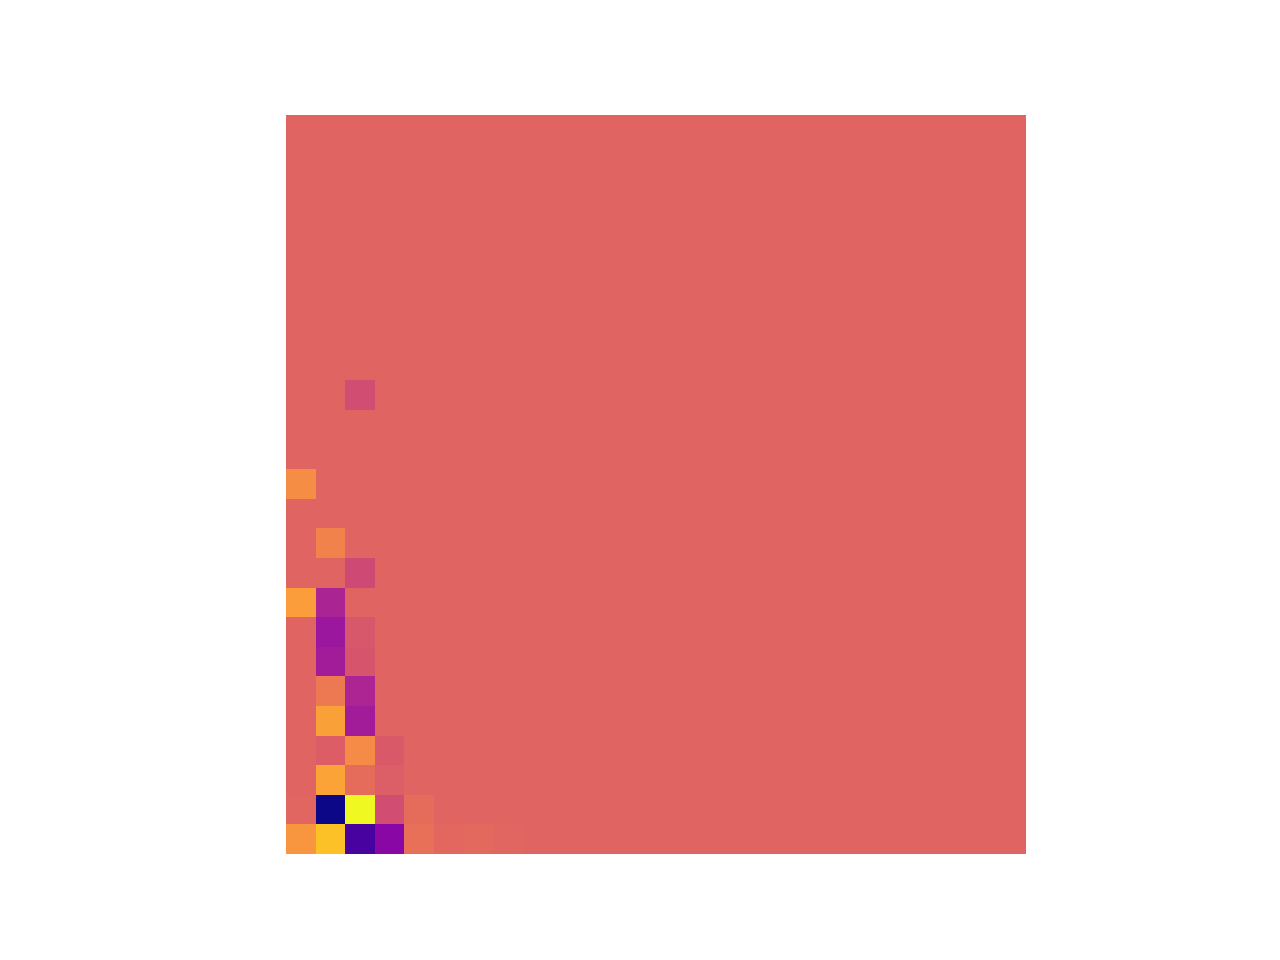

In [44]:
plt.figure()
inverse_image = np.copy(lr.coef_).reshape((25,25))
pim.show(inverse_image)

In [76]:
tableStore = ('/Users/Alicia/Desktop/BioSoundTutorial/vocSelTable.h5')
figdir = '/Users/Alicia/Desktop/BioSoundTutorial/BirdCalls/'
vocSelTable = pd.read_hdf(tableStore)

In [77]:
birdNames = np.unique(vocSelTable['Bird'])
XFeatureNames = np.hstack(('F1', 'F2', 'F3', 'fund'))
X = [vocSelTable.loc[:,col] for col in XFeatureNames]
Xstack = np.stack(X, axis=1)
X = Xstack[:, 0:3]/Xstack[:, 3][:, None]
#X = np.concatenate((X[:, 1:], X[:, 2:]))
y = np.array(vocSelTable['Bird'])

In [135]:
indices = np.concatenate((np.where(labels==2)[0], np.where(labels==0)[0]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)

In [136]:
lr = LogisticRegression(multi_class='ovr',solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
lr.score(X_test, y_test)

0.7368421052631579

<IPython.core.display.Javascript object>


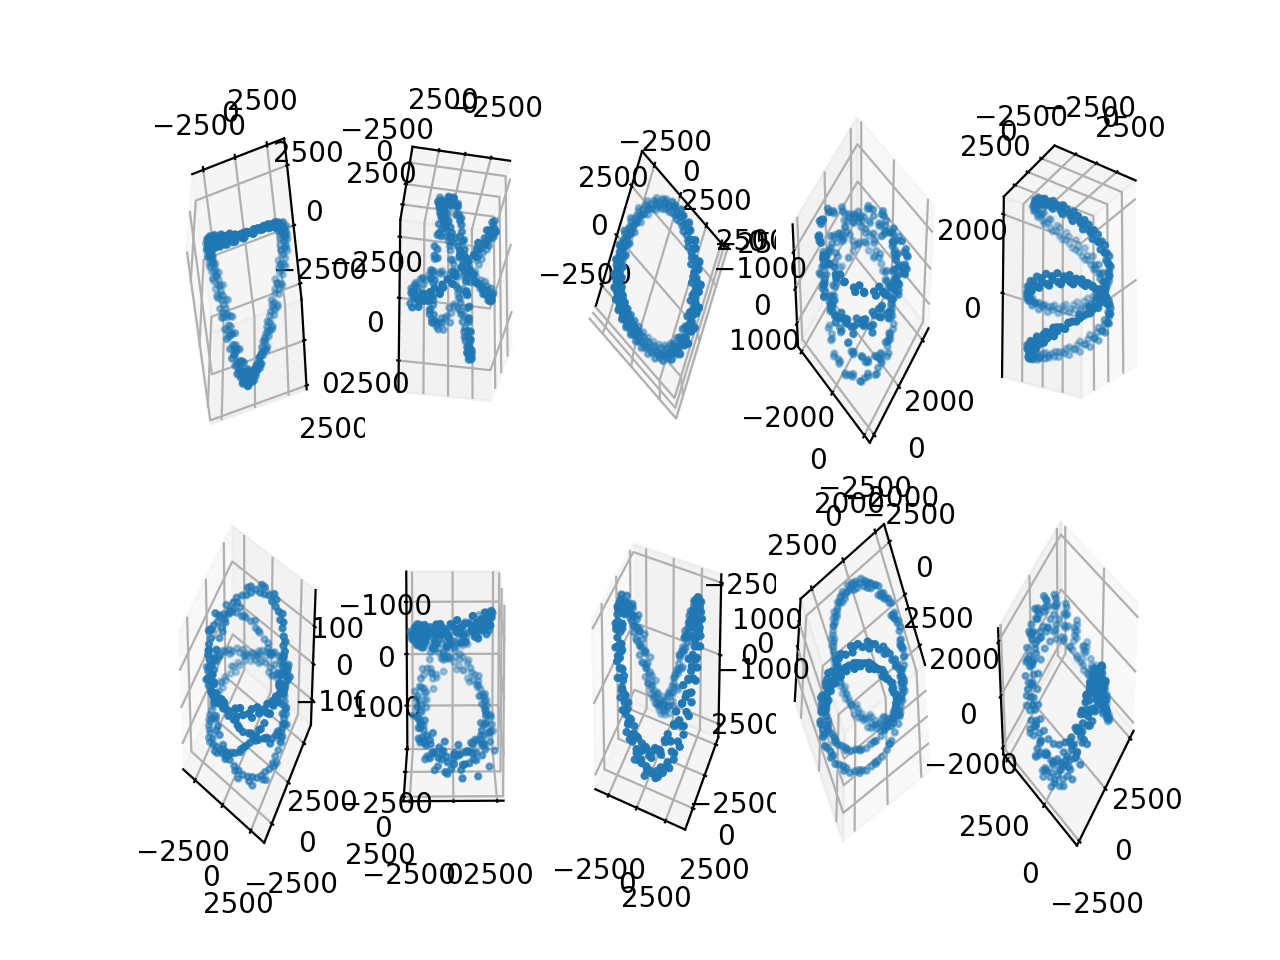

In [25]:
fig = plt.figure()
#for i in range(len(allTimeDelayedSeg)):
iplot = 1
for i in np.concatenate((np.arange(80,85), np.arange(25,30))): 
    ax = plt.subplot(2,5,iplot, projection='3d')
    data = allTimeDelayedSeg[i]
    ax.scatter(data[:,0], data[:,1], data[:,2], s=4)
    iplot+=1
# ax2=fig.add_subplot(122)
# rips.plot(dgms[1], legend=False, show=False)
# plt.title("Persistence diagram of $H_0$ and $H_1$")
# plt.show()

<IPython.core.display.Javascript object>


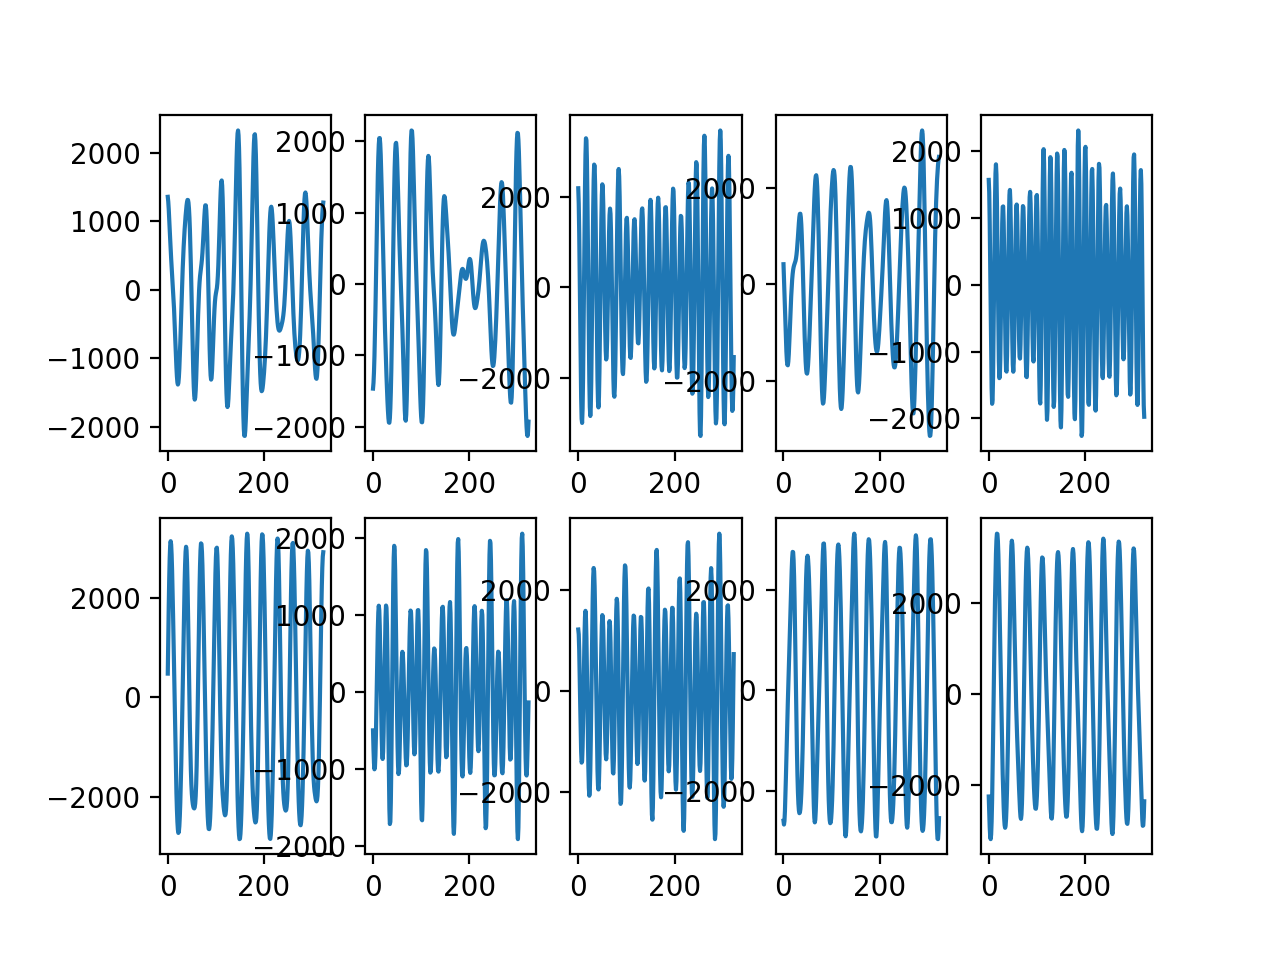

In [45]:
fig = plt.figure()
#for i in range(len(allTimeDelayedSeg)):
iplot = 1
for i in np.concatenate((np.arange(5), np.arange(85,90))): 
    ax=plt.subplot(2,5,iplot)
    data = allTimeDelayedSeg[i]
    ax.plot(data[:,0])
    iplot+=1

In [ ]:
TimeSeries2Ani(YG[4][:], 5, 3, interval = 20, elev = 30, azimspeed = 0.11)

In [46]:
y = labels
X = imgs_array

In [47]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import StratifiedKFold
from scipy.stats import binom

In [49]:
titleStr=''
figdir='.'
Xcolname = None
plotFig = False
removeTickLabels = False
testInd = None

In [51]:
# Global Parameters
CVFOLDS = 10
MINCOUNT = 10
MINCOUNTTRAINING = 5
# figdir = '/Users/frederictheunissen/Documents/Data/Julie/Acoustical Analysis/Figures Voice'

# Initialize Variables and clean up data
classes, classesCount = np.unique(y, return_counts = True)  # Classes to be discriminated should be same as ldaMod.classes_
goodIndClasses = np.array([n >= MINCOUNT for n in classesCount])
goodInd = np.array([b in classes[goodIndClasses] for b in y])
if testInd is not None:
    # Check for goodInd - should be an np.array of dtype=bool
    # Transform testInd into an index inside xGood and yGood
    testIndx = testInd.nonzero()[0]
    goodIndx = goodInd.nonzero()[0]
    testInd = np.hstack([ np.where(goodIndx == testval)[0] for testval in testIndx])
    trainInd = np.asarray([i for i in range(len(goodIndx)) if i not in testInd])

yGood = y[goodInd]
XGood = X[goodInd]
#cValGood = cVal[goodInd]

classes, classesCount = np.unique(yGood, return_counts = True) 
nClasses = classes.size         # Number of classes or groups  


In [56]:
if testInd is None:
    cvFolds = min(min(classesCount), CVFOLDS)
    if (cvFolds < CVFOLDS):
        print ('Warning in ldaPlot: Cross-validation performed with %d folds (instead of %d)' % (cvFolds, CVFOLDS))
else:
    cvFolds = 1
# Data size and color values   
nD = XGood.shape[1]                 # number of features in X
nX = XGood.shape[0] 

In [66]:
# Use a uniform prior 
myPrior = np.ones(nClasses)*(1.0/nClasses)  

# Perform a PCA for dimensionality reduction so that the covariance matrix can be fitted.
nDmax = int(np.fix(np.sqrt(nX//5)))
if nDmax < nD:
    print ('Warning: Insufficient data for', nD, 'parameters. PCA projection to', nDmax, 'dimensions.' )
nDmax = min(nD, nDmax)
nDmax = 10
pca = PCA(n_components=nDmax)
Xr = pca.fit_transform(XGood)
print ('Variance explained is %.2f%%' % (sum(pca.explained_variance_ratio_)*100.0))


# Initialise Classifiers  
ldaMod = LDA(n_components = min(nDmax,nClasses-1), priors = myPrior, shrinkage = None, solver = 'svd') 
qdaMod = QDA(priors = myPrior)
rfMod = RF()   # by default assumes equal weights

Variance explained is 93.87%


In [67]:
ldaYes = 0
qdaYes = 0
rfYes = 0
cvCount = 0

if testInd is None:
    skf = StratifiedKFold(n_splits = cvFolds)
    skfList = skf.split(Xr, yGood)
else:
    skfList = [(trainInd,testInd)]

for train, test in skfList:

    # Enforce the MINCOUNT in each class for Training
    trainClasses, trainCount = np.unique(yGood[train], return_counts=True)
    goodIndClasses = np.array([n >= MINCOUNTTRAINING for n in trainCount])
    goodIndTrain = np.array([b in trainClasses[goodIndClasses] for b in yGood[train]])

    # Specity the training data set, the number of groups and priors
    yTrain = yGood[train[goodIndTrain]]
    XrTrain = Xr[train[goodIndTrain]]

    trainClasses, trainCount = np.unique(yTrain, return_counts=True) 
    ntrainClasses = trainClasses.size

    # Skip this cross-validation fold because of insufficient data
    if ntrainClasses < 2:
        continue
    goodInd = np.array([b in trainClasses for b in yGood[test]])    
    if (goodInd.size == 0):
        continue

    # Fit the data
    trainPriors = np.ones(ntrainClasses)*(1.0/ntrainClasses)
    ldaMod.priors = trainPriors
    qdaMod.priors = trainPriors
    ldaMod.fit(XrTrain, yTrain)
    qdaMod.fit(XrTrain, yTrain)        
    rfMod.fit(XrTrain, yTrain)


    ldaYes += np.around((ldaMod.score(Xr[test[goodInd]], yGood[test[goodInd]]))*goodInd.size)
    qdaYes += np.around((qdaMod.score(Xr[test[goodInd]], yGood[test[goodInd]]))*goodInd.size)
    rfYes += np.around((rfMod.score(Xr[test[goodInd]], yGood[test[goodInd]]))*goodInd.size)
    cvCount += goodInd.size



# Refit with all the data  for the plots

ldaMod.priors = myPrior
qdaMod.priors = myPrior
Xrr = ldaMod.fit_transform(Xr, yGood)
# Check labels
for a, b in zip(classes, ldaMod.classes_):
    if a != b:
        print ('Error in ldaPlot: labels do not match')

/Users/Alicia/Envs/tstop/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [68]:
# Print the five largest coefficients of first 3 DFA
MAXCOMP = 2        # Maximum number of DFA componnents
MAXWEIGHT = 5     # Maximum number of weights printed for each component

ncomp = min(MAXCOMP, nClasses-1)
nweight = min(MAXWEIGHT, nD)

# The scalings_ has the eigenvectors of the LDA in columns and the pca.componnents has the eigenvectors of PCA in columns
weights = np.dot(ldaMod.scalings_[:,0:ncomp].T, pca.components_)

print('LDA Weights:')
for ic in range(ncomp):
    idmax = np.argsort(np.abs(weights[ic,:]))[::-1]
    print('DFA %d: '%ic, end = '')
    for iw in range(nweight):
        if Xcolname is None:
            colstr = 'C%d' % idmax[iw]
        else:
            colstr = Xcolname[idmax[iw]]
        print('%s %.3f; ' % (colstr, float(weights[ic, idmax[iw]]) ), end='')
    print()

LDA Weights:
DFA 0: C576 -0.944; C501 -0.767; C551 0.591; C602 -0.419; C552 -0.412; 
DFA 1: C501 1.593; C526 1.470; C600 0.641; C451 -0.528; C577 0.214; 


In [69]:
# Results
ldaYes = int(ldaYes)
qdaYes = int(qdaYes)
rfYes = int(rfYes)

p = 1.0/nClasses
ldaP = 0
qdaP = 0
rfP = 0

for k in range(ldaYes, cvCount+1):
    ldaP += binom.pmf(k, cvCount, p)

for k in range(qdaYes, cvCount+1):
    qdaP += binom.pmf(k, cvCount, p)

for k in range(rfYes, cvCount+1):
    rfP += binom.pmf(k, cvCount, p)

print ("Number of classes %d. Chance level %.2f %%" % (nClasses, 100.0/nClasses))
print ("%s LDA: %.2f %% (%d/%d p=%.4f)" % (titleStr, 100.0*ldaYes/cvCount, ldaYes, cvCount, ldaP))
print ("%s QDA: %.2f %% (%d/%d p=%.4f)" % (titleStr, 100.0*qdaYes/cvCount, qdaYes, cvCount, qdaP))
print ("%s RF: %.2f %% (%d/%d p=%.4f)" % (titleStr, 100.0*rfYes/cvCount, rfYes, cvCount, rfP))
#return ldaYes, qdaYes, rfYes, cvCount, ldaP, qdaP, rfP, nClasses, weights

Number of classes 4. Chance level 25.00 %
 LDA: 46.15 % (42/91 p=0.0000)
 QDA: 58.24 % (53/91 p=0.0000)
 RF: 50.55 % (46/91 p=0.0000)
